# Titanic Shipwreck Exploration
### by Shubh

## Investigation Overview

In this investigation of titanic disaster I am going to focus on survival rate for various features and how passenger's age, ticket type, and gender shows impact on their survival rate.

## Dataset Overview

The wreck of the RMS Titanic lies at a depth of about 12,500 feet (3.8 km; 2.37 mi), about 370 miles (600 km) south-southeast off the coast of Newfoundland. It lies in two main pieces about a third of a mile (600 m) apart. The bow is still recognisable with many preserved interiors, despite deterioration and damage sustained hitting the sea floor. In contrast, the stern is completely ruined. A debris field around the wreck contains hundreds of thousands of items spilled from the ship as she sank. The bodies of the passengers and crew would have also been distributed across the sea bed, but have been consumed by other organisms.

There were people who survived this disaster depending on some features like gender, age , ticket type, etc that we will explore in this investigation.There are 891 records of passengers in this dataset with 12 features. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df=pd.read_csv('updated.csv')

## Survived

### Question: Is survival rate was higher than the death rate?

Here I found number of passengers who survived were less than the number of the passengers who died, that were travelling in titanic ship. 

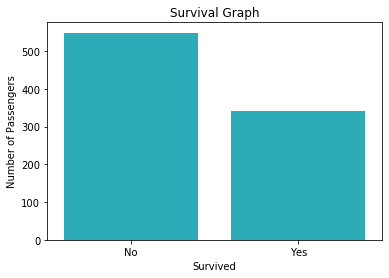

In [3]:
base_color=sb.color_palette()[9]
sb.countplot(data=df,x='Survived',color=base_color)
plt.xticks([0,1],['No','Yes']);
plt.title('Survival Graph');
plt.xlabel('Survived')
plt.ylabel('Number of Passengers');

## Passenger's Ticket type

### What type of ticket majority of passengers were having?

It is visible that number of 3rd class passengers is maximum than 1st and 2nd class comes

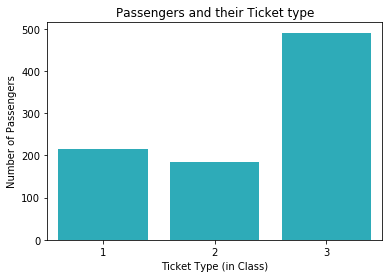

In [4]:
sb.countplot(data=df,x='Pclass',color=base_color);
plt.title('Passengers and their Ticket type');
plt.xlabel('Ticket Type (in Class)')
plt.ylabel('Number of Passengers');

## Age Gap

### Question: What are the age of passengers(in range) travelling in the ship?

According to the age distribution box plot, it is seen that 95% of passengers are of age 1-63 years.                            80 years is the maximum age.
Ages from 21 to 38 takes around 50% of the passengers.

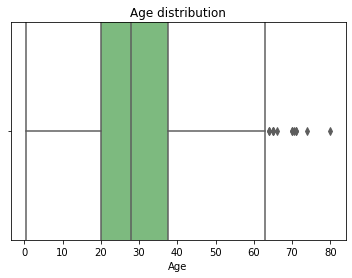

In [5]:
sb.boxplot(x='Age', data=df, palette='Greens', orient='h', width=10)
plt.title("Age distribution");
plt.xlabel('Age');

## Different Age Groups

### Question: Which major age group were travelling in the ship?

It is visible that more than 700 passengers were adults(19-64 years old) which is around of 80% of the total population in the ship.

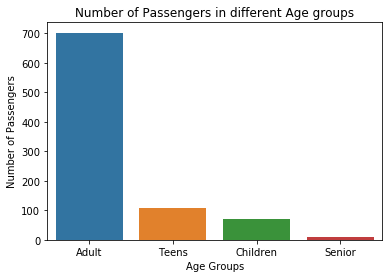

In [6]:
labels=['Children','Teens','Adult','Senior']
bins=[0,13,18,64,np.inf]
df['Age Group']=pd.cut(df['Age'],bins,labels=labels)
ageGroup_values=df['Age Group'].value_counts()
sb.countplot(data=df,x='Age Group',order=ageGroup_values.index);
plt.title('Number of Passengers in different Age groups');
plt.xlabel('Age Groups')
plt.ylabel('Number of Passengers');

## Survival among  Different Age Groups

### Question: What would be the survival rate according to their age?

Maximum passengers died

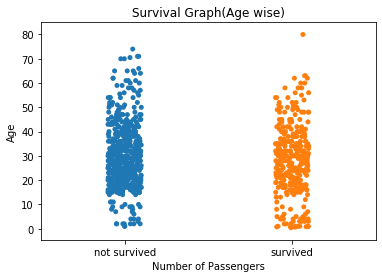

In [7]:
sb.stripplot(data=df,x="Survived", y="Age",jitter=True);
plt.title('Survival Graph(Age wise)');
plt.xlabel('Number of Passengers')
plt.ylabel('Age');
plt.xticks([1,0],['survived','not survived']);

## Relation between Survived, Pclass, Age

### Question: What is the relation between survival rate, ticket type and age?

On an average most of the passengers who are:

1. Pclass 1 survived
2. Children in class 2 almost survived
3. Pclass 3 has low  survival rate

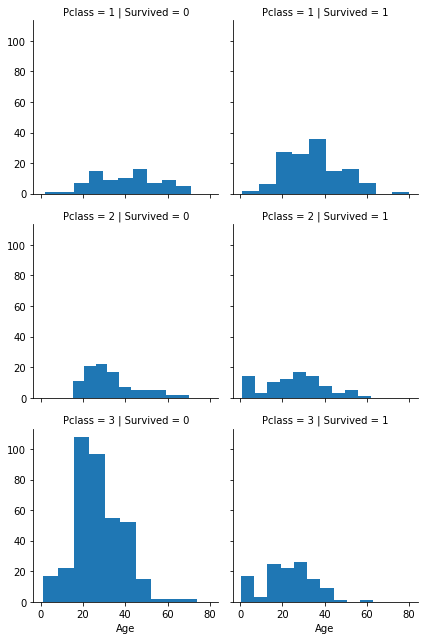

In [8]:
g=sb.FacetGrid(df,col='Survived', row='Pclass');
g.map(plt.hist,'Age');

## Male Vs Female Survival

### Question: What conclusions would you draw from above observations with reference to male and female candidates?

Oberservations:

1. Female who are older than 40 and belongs to Pclass 3 has low survival rate
2. Between age 15-35 most passenger were male belonging to Pclass 3

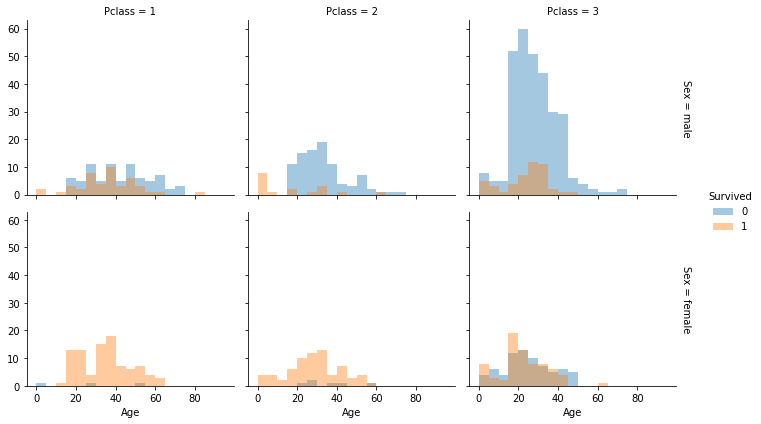

In [9]:
bins = np.arange(0, 100, 5)
g = sb.FacetGrid(df, row='Sex', col='Pclass', hue='Survived', margin_titles=True, height=3, aspect=1.1)
g.map(sb.distplot, 'Age', kde=False, bins=bins,)
g.add_legend() ; 
# Here, in legend 0 means not survived and 1 means survived.